# binary Study with ***"Average Feature Importance"***

### In pursuit of a well-balanced dataset, a stratified selection approach was employed, randomly extracting 20\% of samples from each class encompassed within the CICIDS2017 dataset.

##### The distinct categories of malicious attacks, comprising **Infiltration, WebAttack, BruteForce, Bot, PortScan, and DoS**, were effectively amalgamated and designated under the unified label of WebAttack. This consolidation facilitated the formation of two distinct cohorts: Normaltraffic and WebAttack, resulting in a database configuration with 454,619 instances of Normaltraffic and 111,526 instances of WebAttack.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

### Read the sampled CICIDS2017 dataset

In [3]:
df = pd.read_csv('./data/CICIDS2017_20Percent.csv')

In [4]:
df.Label.value_counts()

Normaltraffic            454619
DoSHulk                   46216
PortScan                  31786
DDoS                      25596
DoSGoldenEye               2060
FTPPatator                 1588
SSHPatator                 1179
DoSslowloris               1160
DoSSlowhttptest            1101
Bot                         393
WebAttackBruteForce         301
WebAttackXSS                132
Infiltration                  7
WebAttackSqlInjection         4
Heartbleed                    3
Name: Label, dtype: int64

In [5]:

# Define the mapping of old class names to new class name (WebAttack)
class_mapping = {
    'DoSHulk': 'WebAttack',
    'PortScan': 'WebAttack',
    'DDoS': 'WebAttack',
    'DoSGoldenEye': 'WebAttack',
    'FTPPatator': 'WebAttack',
    'SSHPatator': 'WebAttack',
    'DoSslowloris': 'WebAttack',
    'DoSSlowhttptest': 'WebAttack',
    'Bot': 'WebAttack',
    'WebAttackBruteForce': 'WebAttack',
    'WebAttackXSS': 'WebAttack',
    'Infiltration': 'WebAttack',
    'WebAttackSqlInjection': 'WebAttack',
    'Heartbleed': 'WebAttack'
}

# Replace the old class names with the new class name 'WebAttack'
df['Label'] = df['Label'].replace(class_mapping)

In [6]:
df.Label.value_counts()

Normaltraffic    454619
WebAttack        111526
Name: Label, dtype: int64

In [7]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [8]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [9]:
X_train.shape

(452916, 77)

In [10]:
pd.Series(y_train).value_counts()

0    363695
1     89221
dtype: int64

## Machine learning model training
### Training four base learners: decision tree, random forest, extra trees, XGBoost

### Decision tree training and prediction

Accuracy of DT: 0.995778466647237
Precision of DT: 0.9957770127008746
Recall of DT: 0.995778466647237
F1-score of DT: 0.9957776805116648
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



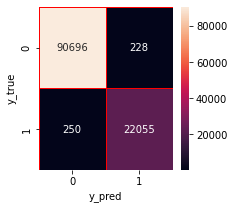

In [11]:
# Create and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Evaluate the model
dt_score = dt.score(X_test, y_test)
y_predict = dt.predict(X_test)
y_true = y_test

# Print accuracy
print('Accuracy of DT:', dt_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print precision, recall, and F1-score
print('Precision of DT:', precision)
print('Recall of DT:', recall)
print('F1-score of DT:', fscore)

# Print classification report
print(classification_report(y_true, y_predict))

# Create confusion matrix
cm = confusion_matrix(y_true, y_predict)

# Plot confusion matrix
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [12]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

### Random Forest training and prediction

Accuracy of RF: 0.9965468210440788
Precision of RF: 0.996547751942525
Recall of RF: 0.9965468210440788
F1-score of RF: 0.9965472589782662
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



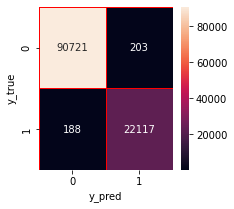

In [13]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

### Extra trees training and prediction

Accuracy of ET: 0.9958137932861723
Precision of ET: 0.9958113483489324
Recall of ET: 0.9958137932861723
F1-score of ET: 0.9958123751058559
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



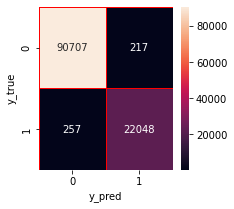

In [15]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [16]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

### XGboost training and prediction

Accuracy of XGBoost: 0.9938708281447333
Precision of XGBoost: 0.9938646097268036
Recall of XGBoost: 0.9938708281447333
F1-score of XGBoost: 0.9938670868409278
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.98      0.98     22305

    accuracy                           0.99    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       0.99      0.99      0.99    113229



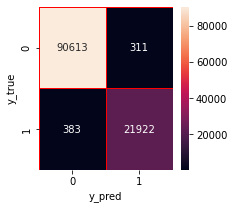

In [17]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [18]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

### Stacking model construction (ensemble for 4 base learners)

In [19]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [20]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [21]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [22]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.995778466647237
Precision of Stacking: 0.9957770127008746
Recall of Stacking: 0.995778466647237
F1-score of Stacking: 0.9957776805116648
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



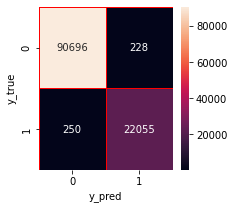

In [23]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Feature Selection

### Feature importance

In [24]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [25]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [26]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.2192, 'Bwd_Packet_Length_Std'), (0.1155, 'Average_Packet_Size'), (0.1037, 'Min_Packet_Length'), (0.0429, 'Flow_Packets_s'), (0.0407, 'DestinationPort'), (0.0318, 'Bwd_Packet_Length_Mean'), (0.0281, 'Avg_Bwd_Segment_Size'), (0.0252, 'PSH_Flag_Count'), (0.0228, 'Packet_Length_Std'), (0.0221, 'Bwd_Packet_Length_Max'), (0.0212, 'Packet_Length_Mean'), (0.0196, 'Packet_Length_Variance'), (0.0187, 'Init_Win_bytes_forward'), (0.0174, 'Flow_IAT_Mean'), (0.0171, 'Max_Packet_Length'), (0.0166, 'Fwd_Packet_Length_Min'), (0.0151, 'Fwd_Packets_s'), (0.0124, 'Fwd_IAT_Min'), (0.0116, 'Bwd_Packet_Length_Min'), (0.0094, 'Idle_Max'), (0.0092, 'Flow_IAT_Min'), (0.0092, 'Avg_Fwd_Segment_Size'), (0.0091, 'Fwd_IAT_Std'), (0.0087, 'Total_Length_of_Fwd_Packets'), (0.0082, 'Subflow_Fwd_Bytes'), (0.0082, 'Fwd_Packet_Length_Mean'), (0.008, 'Init_Win_bytes_backward'), (0.0079, 'Fwd_Packet_Length_Max'), (0.0075, 'Fwd_IAT_Max'), (0.0074, 'ACK_Flag_Count'), (0.0065, 'FIN_Flag_Count

In [27]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [28]:
len(f_list)

77

In [29]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break 

In [30]:
X_fs = df[fs].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [32]:
X_train.shape

(452916, 31)

In [33]:
pd.Series(y_train).value_counts()

0    363695
1     89221
dtype: int64

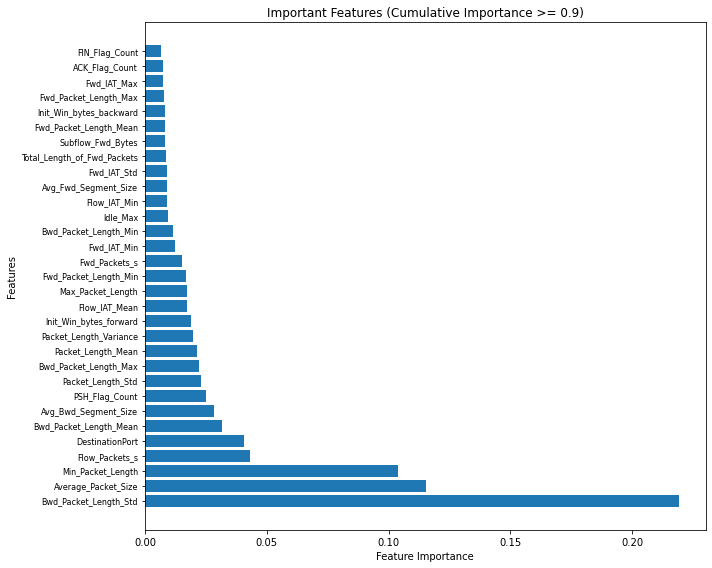

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

# Calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature) / 4

# Get the feature names
feature_names = df.drop(['Label'], axis=1).columns.values

# Sort the features based on their score
sorted_features = sorted(zip(avg_feature, feature_names), reverse=True)

# Extract the sorted scores and feature names
sorted_scores, sorted_names = zip(*sorted_features)

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_scores)

# Find the index where cumulative importance reaches 0.9
index = np.where(cumulative_importance >= 0.9)[0][0]

# Extract the important features
important_features = sorted_names[:index+1]
important_scores = sorted_scores[:index+1]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(important_features)), important_scores, align='center')
plt.yticks(range(len(important_features)), important_features, fontsize=8)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.title('Important Features (Cumulative Importance >= 0.9)', fontsize=12)
plt.tight_layout()  # Adjust spacing between the bars

plt.show()

In [35]:
from tabulate import tabulate

# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

# Calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature) / 4

# Get the feature names
feature_names = df.drop(['Label'], axis=1).columns.values

# Sort the features based on their score
sorted_features = sorted(zip(avg_feature, feature_names), reverse=True)

# Extract the sorted scores and feature names
sorted_scores, sorted_names = zip(*sorted_features)

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_scores)

# Find the index where cumulative importance reaches 0.9
index = np.where(cumulative_importance >= 0.9)[0][0]

# Extract the important features and their corresponding scores
important_features = sorted_names[:index+1]
important_scores = sorted_scores[:index+1]

# Calculate the weights for the important features
total_importance = np.sum(important_scores)
weights = important_scores / total_importance

# Create a list of lists for the table
table_data = [[feature, weight] for feature, weight in zip(important_features, weights)]

# Define the table headers
headers = ["Feature", "Weight"]

# Print the table
table = tabulate(table_data, headers, tablefmt="fancy_grid")
print(table)


╒═════════════════════════════╤════════════╕
│ Feature                     │     Weight │
╞═════════════════════════════╪════════════╡
│ Bwd_Packet_Length_Std       │ 0.243273   │
├─────────────────────────────┼────────────┤
│ Average_Packet_Size         │ 0.128243   │
├─────────────────────────────┼────────────┤
│ Min_Packet_Length           │ 0.115131   │
├─────────────────────────────┼────────────┤
│ Flow_Packets_s              │ 0.0476487  │
├─────────────────────────────┼────────────┤
│ DestinationPort             │ 0.0451672  │
├─────────────────────────────┼────────────┤
│ Bwd_Packet_Length_Mean      │ 0.0352537  │
├─────────────────────────────┼────────────┤
│ Avg_Bwd_Segment_Size        │ 0.0311957  │
├─────────────────────────────┼────────────┤
│ PSH_Flag_Count              │ 0.0279199  │
├─────────────────────────────┼────────────┤
│ Packet_Length_Std           │ 0.025358   │
├─────────────────────────────┼────────────┤
│ Bwd_Packet_Length_Max       │ 0.0244955  │
├─────────

╒═════════════════════════════╤════════════╕
│ Feature                     │     Weight │
╞═════════════════════════════╪════════════╡
│ Bwd_Packet_Length_Std       │ 0.243273   │
├─────────────────────────────┼────────────┤
│ Average_Packet_Size         │ 0.128243   │
├─────────────────────────────┼────────────┤
│ Min_Packet_Length           │ 0.115131   │
├─────────────────────────────┼────────────┤
│ Flow_Packets_s              │ 0.0476487  │
├─────────────────────────────┼────────────┤
│ DestinationPort             │ 0.0451672  │
├─────────────────────────────┼────────────┤
│ Bwd_Packet_Length_Mean      │ 0.0352537  │
├─────────────────────────────┼────────────┤
│ Avg_Bwd_Segment_Size        │ 0.0311957  │
├─────────────────────────────┼────────────┤
│ PSH_Flag_Count              │ 0.0279199  │
├─────────────────────────────┼────────────┤
│ Packet_Length_Std           │ 0.025358   │
├─────────────────────────────┼────────────┤
│ Bwd_Packet_Length_Max       │ 0.0244955  │
├─────────

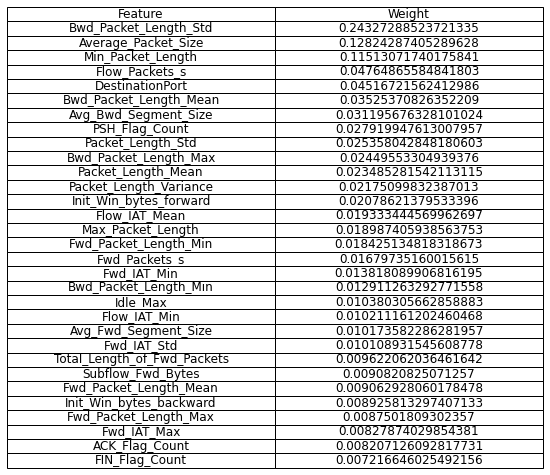

In [36]:
from tabulate import tabulate
import matplotlib.pyplot as plt

# Your code to calculate the important features and weights

# Create a list of lists for the table
table_data = [[feature, weight] for feature, weight in zip(important_features, weights)]

# Define the table headers
headers = ["Feature", "Weight"]

# Print the table
table_str = tabulate(table_data, headers, tablefmt="fancy_grid")
print(table_str)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.axis("off")

# Plot the table
table = ax.table(cellText=table_data, colLabels=headers, cellLoc="center", loc="center")

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the figure as a PDF
plt.savefig("table.pdf", bbox_inches="tight")

## Machine learning model training after feature selection

Accuracy of DT: 0.9957961299667046
Precision of DT: 0.9957946826034434
Recall of DT: 0.9957961299667046
F1-score of DT: 0.9957953471204027
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



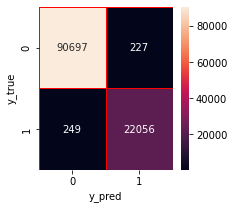

In [37]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [38]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.997721431788676
Precision of RF: 0.9977326788442119
Recall of RF: 0.997721431788676
F1-score of RF: 0.9977243092338232
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      1.00      0.99     22305

    accuracy                           1.00    113229
   macro avg       1.00      1.00      1.00    113229
weighted avg       1.00      1.00      1.00    113229



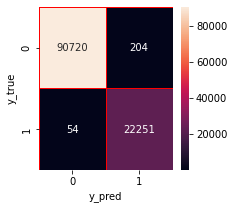

In [39]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [40]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9960522480989853
Precision of ET: 0.9960506217081198
Recall of ET: 0.9960522480989853
F1-score of ET: 0.9960513457250212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



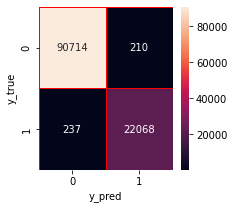

In [41]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [42]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.992934672212949
Precision of XGBoost: 0.9929207026538203
Recall of XGBoost: 0.992934672212949
F1-score of XGBoost: 0.9929233698982448
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     90924
           1       0.99      0.98      0.98     22305

    accuracy                           0.99    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       0.99      0.99      0.99    113229



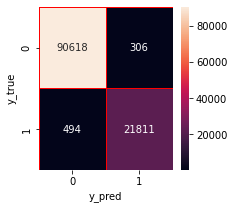

In [43]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

### Stacking model construction

In [45]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [46]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [47]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.996158228015791
Precision of Stacking: 0.9961559714301078
Recall of Stacking: 0.996158228015791
F1-score of Stacking: 0.9961568939418045
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90924
           1       0.99      0.99      0.99     22305

    accuracy                           1.00    113229
   macro avg       0.99      0.99      0.99    113229
weighted avg       1.00      1.00      1.00    113229



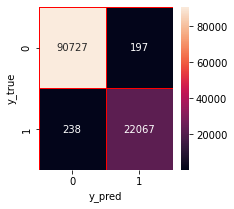

In [48]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()